In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import random

def Lissajous(n,nx,ny,nz,φx=1,φy=1,φz=1,tf=2*np.pi):
    t = np.linspace(0, tf, 500)
#     r = np.linspace(0, (2*np.pi - 2*np.pi/n) - 0.1, n) #Nodes out of phase by 0.1
    r = np.sort( np.array( random.sample( range(2*n), n) )*(2*np.pi/(2*n)) ) #Random nodes
    # the range in the r array has to be of length greater than n so that there is room for the random values, 
    # otherwise if length(r) == n, then we have again the symmetric case
    x,y,z = np.cos(nx*t + φx), np.cos(ny*t + φy), np.cos(nz*t + φz) #Knot
    a,b,c = np.cos(nx*r + φx), np.cos(ny*r + φy), np.cos(nz*r + φz) #Nodes
    
    #Tangent vector T(t) = r'(t)/||r'(t)||
    t1,t2,t3 = -nx*np.sin(nx*t + φx), -ny*np.sin(ny*t + φy), -nz*np.sin(nz*t + φz)
    T1,T2,T3 = (t1, t2, t3) #/ np.linalg.norm([t1, t2, t3])
    T = np.array([T1,T2,T3]).T
    
    #Normal vector N(t) = T'(t)/||T'(t)||
    n1,n2,n3 = -(nx**2)*x, -(ny**2)*y, -(nz**2)*z
    N1,N2,N3 = (n1, n2, n3) #/ np.linalg.norm([n1, n2, n3])
    N = np.array([N1,N2,N3]).T
    
    #Binormal vector B(t) = T(t) x N(t)
    B = np.cross(T,N)
   
    #Indexes for antipodes
    lines = [[i, i + len(r)//2] for i in range(len(r)//2) ]
    
    #Circle
    xc, yc = np.cos(r), np.sin(r)
    circle = [go.Scatter(x=np.cos(t), y=np.sin(t), line=dict(width=2, color='brown'))]
    
    #Circle bars                               
    for m in lines:
        circle.append( go.Scatter( x = [ xc[m[0]], xc[m[1]] ], y = [ yc[m[0]], yc[m[1]] ], 
                                   line = dict(width=2), marker=dict(size=9)) )
    fig = go.Figure(data=circle)
    fig.update_yaxes(scaleanchor = 'x', scaleratio = 1)
    fig.show()
  
    #Knot
    knot = [go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=3, color='brown'))]

    #Bridges between antipodes
    for l in lines:
        knot.append(go.Scatter3d(x=[ a[l[0]], a[l[1]] ],
                                 y=[ b[l[0]], b[l[1]] ],
                                 z=[ c[l[0]], c[l[1]] ], line=dict(width=3)))
    #TNB
    knot.append(go.Scatter3d(x=N1, y=N2, z=N3, mode='lines', line=dict(width=3, color='orange')))

    fig = go.Figure(data=knot)
    fig.show()
    
    return np.hstack((np.vstack(x), np.vstack(y), np.vstack(z)))

In [4]:
A = Lissajous(6,7,3,5)

https://stackoverflow.com/questions/36760771/how-to-calculate-a-circle-perpendicular-to-a-vector

In [18]:
def addTube(radius, segments, P1, P2):
    # Q = P1→P2 moved to origin
    Qx = P2[0] - P1[0]
    Qy = P2[1] - P1[1]
    Qz = P2[2] - P1[2]
    # Create vectors U and V that are (1) mutually perpendicular and (2) perpendicular to Q
    if (Qx != 0):  # create a perpendicular vector on the XY plane
        # there are an infinite number of potential vectors arbitrarily select y = 1
        Ux = -Qy/Qx
        Uy = 1
        Uz = 0
    # to prove U is perpendicular:
    # (Qx, Qy, Qz)·(Ux, Uy, Uz) = Qx·Ux + Qy·Uy + Qz·Uz = Qx·-Qy/Qx + Qy·1 + Qz·0 = -Qy + Qy + 0 = 0

    elif (Qy != 0):  # create a perpendicular vector on the YZ plane
        Ux = 0
        Uy = -Qz/Qy
        Uz = 1

    elif (Qz != 0):  # create a perpendicular vector on the XZ plane
        Ux = 1
        Uy = 0
        Uz = -Qx/Qz
    # The cross product of two vectors is perpendicular to both, so to find V:
    # (Vx, Vy, Vz) = (Qx, Qy, Qz)×(Ux, Uy, Uz) = (Qy×Uz - Qz×Uy, Qz×Ux - Qx×Uz, Qx×Uy - Qy×Ux)
    Vx = Qy*Uz - Qz*Uy
    Vy = Qz*Ux - Qx*Uz
    Vz = Qx*Uy - Qy*Ux
    # normalize U and V:
    Ulength = np.sqrt(Ux**2 + Uy**2 + Uz**2)
    Vlength = np.sqrt(Vx**2 + Vy**2 + Vz**2)
    Ux /= Ulength
    Uy /= Ulength
    Uz /= Ulength
    Vx /= Vlength
    Vy /= Vlength
    Vz /= Vlength
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.axis('off')

    for i in range(segments):
        θ = 2*np.pi*i/segments  # theta
        dx = radius*(np.cos(θ)*Ux + np.sin(θ)*Vx)
        dy = radius*(np.cos(θ)*Uy + np.sin(θ)*Vy)
        dz = radius*(np.cos(θ)*Uz + np.sin(θ)*Vz)
        plt.plot([P1[0] + dx, P2[0] + dx], [P1[1] + dy, P2[1] + dy], [P1[2] + dz, P2[2] + dz], 'c-')  # point on circle around P1
        
    plt.plot([P1[0], P2[0]], [P1[1], P2[1]], [P1[2], P2[2]], 'm-')

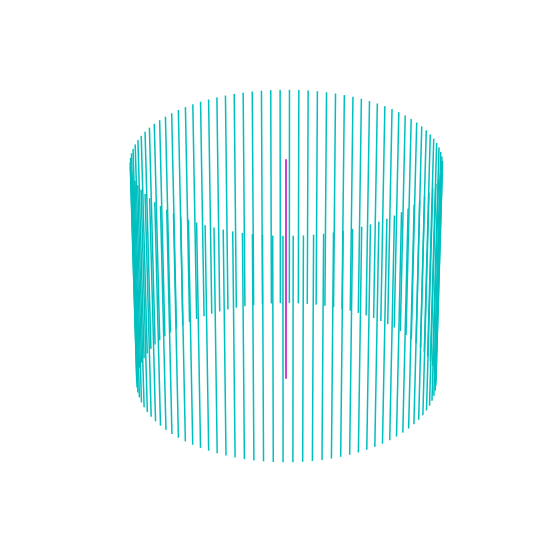

In [19]:
addTube(1,100,[0,0,0],[0,0,1])

In [25]:
def addTube(radius, segments, P1, P2):
    # Q = P1→P2 moved to origin
    Qx = P2[0] - P1[0]
    Qy = P2[1] - P1[1]
    Qz = P2[2] - P1[2]
    # Create vectors U and V that are (1) mutually perpendicular and (2) perpendicular to Q
    if (Qx != 0):  # create a perpendicular vector on the XY plane
        # there are an infinite number of potential vectors arbitrarily select y = 1
        Ux = -Qy/Qx
        Uy = 1
        Uz = 0
    # to prove U is perpendicular:
    # (Qx, Qy, Qz)·(Ux, Uy, Uz) = Qx·Ux + Qy·Uy + Qz·Uz = Qx·-Qy/Qx + Qy·1 + Qz·0 = -Qy + Qy + 0 = 0

    elif (Qy != 0):  # create a perpendicular vector on the YZ plane
        Ux = 0
        Uy = -Qz/Qy
        Uz = 1

    elif (Qz != 0):  # create a perpendicular vector on the XZ plane
        Ux = 1
        Uy = 0
        Uz = -Qx/Qz
    # The cross product of two vectors is perpendicular to both, so to find V:
    # (Vx, Vy, Vz) = (Qx, Qy, Qz)×(Ux, Uy, Uz) = (Qy×Uz - Qz×Uy, Qz×Ux - Qx×Uz, Qx×Uy - Qy×Ux)
    Vx = Qy*Uz - Qz*Uy
    Vy = Qz*Ux - Qx*Uz
    Vz = Qx*Uy - Qy*Ux
    # normalize U and V:
    Ulength = np.sqrt(Ux**2 + Uy**2 + Uz**2)
    Vlength = np.sqrt(Vx**2 + Vy**2 + Vz**2)
    Ux /= Ulength
    Uy /= Ulength
    Uz /= Ulength
    Vx /= Vlength
    Vy /= Vlength
    Vz /= Vlength
    
    tube = [go.Scatter3d(x=[P1[0], P2[0]], y=[P1[1], P2[1]], z=[P1[2], P2[2]], mode='lines', line=dict(width=3, color='magenta'))]
    
    for i in range(segments):
        θ = 2*np.pi*i/segments  # theta
        dx = radius*(np.cos(θ)*Ux + np.sin(θ)*Vx)
        dy = radius*(np.cos(θ)*Uy + np.sin(θ)*Vy)
        dz = radius*(np.cos(θ)*Uz + np.sin(θ)*Vz)
        tube.append(go.Scatter3d(x=[P1[0] + dx, P2[0] + dx], y=[P1[1] + dy, P2[1] + dy], z=[P1[2] + dz, P2[2] + dz], mode='lines', line=dict(width=3, color='gray')))

    fig = go.Figure(data=tube)
    fig.update_yaxes(scaleanchor = 'x', scaleratio = 1)
    fig.show()

In [26]:
addTube(1,300,[0,0,0],[0,0,10])

In [7]:
def rotationMatrix(axis, theta):
    mat = np.eye(3,3)
    axis = axis/np.sqrt(np.dot(axis, axis))
    a = np.cos(theta/2.)
    b, c, d = -axis*np.sin(theta/2.)

    return np.array([[a*a+b*b-c*c-d*d, 2*(b*c-a*d), 2*(b*d+a*c)],
                     [2*(b*c+a*d), a*a+c*c-b*b-d*d, 2*(c*d-a*b)],
                     [2*(b*d-a*c), 2*(c*d+a*b), a*a+d*d-b*b-c*c]])

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import random

def Lissajous(n,nx,ny,nz,φx=1,φy=1,φz=1,tf=2*np.pi):
    t = np.linspace(0, tf, 500)
#     r = np.linspace(0, (2*np.pi - 2*np.pi/n) - 0.1, n) #Nodes out of phase by 0.1
    r = np.sort( np.array( random.sample( range(2*n), n) )*(2*np.pi/(2*n)) ) #Random nodes
    # the range in the r array has to be of length greater than n so that there is room for the random values, 
    # otherwise if length(r) == n, then we have again the symmetric case
    x,y,z = np.cos(nx*t + φx), np.cos(ny*t + φy), np.cos(nz*t + φz) #Knot
    a,b,c = np.cos(nx*r + φx), np.cos(ny*r + φy), np.cos(nz*r + φz) #Nodes
    
    points = np.hstack((np.vstack(x), np.vstack(y), np.vstack(z)))
    # Number of points
    n = len(points)
    print(n)

    # Calculate all tangents 
    T = np.apply_along_axis(np.gradient, axis=0, arr=points)

    # Normalize all tangents
    f = lambda m : m / np.linalg.norm(m)
    T = np.apply_along_axis(f, axis=1, arr=T)

    # Initialize the first parallel-transported normal vector V
    V = np.zeros(np.shape(points))
    V[0] = (T[0][1], -T[0][0], 0)
    V[0] = V[0] / np.linalg.norm(V[0])

    # Compute the values for V for each tangential vector from T
    for i in range(n - 1):
        b = np.cross(T[i], T[i + 1])
        if np.linalg.norm(b) < 0.00001:
            V[i + 1] = V[i]
        else:
            b = b / np.linalg.norm(b)
            phi = np.arccos(np.dot(T[i], T[i + 1]))
            R = rotationMatrix(phi, b)
            print(f'R={R}, V={V[i].shape}')
            V[i + 1] = R.dot(V[i])

    # Calculate the second parallel-transported normal vector U
    U = np.array([np.cross(t, v) for (t, v) in zip(T, V)])
      
    #Indexes for antipodes
    lines = [[i, i + len(r)//2] for i in range(len(r)//2) ]
    
    #Circle
    xc, yc = np.cos(r), np.sin(r)
    circle = [go.Scatter(x=np.cos(t), y=np.sin(t), line=dict(width=2, color='brown'))]
    
    #Circle bars                               
    for m in lines:
        circle.append( go.Scatter( x = [ xc[m[0]], xc[m[1]] ], y = [ yc[m[0]], yc[m[1]] ], 
                                   line = dict(width=2), marker=dict(size=9)) )
    fig = go.Figure(data=circle)
    fig.update_yaxes(scaleanchor = 'x', scaleratio = 1)
    fig.show()
  
    #Knot
    knot = [go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=3, color='brown'))]

    #Bridges between antipodes
    for l in lines:
        knot.append(go.Scatter3d(x=[ a[l[0]], a[l[1]] ],
                                 y=[ b[l[0]], b[l[1]] ],
                                 z=[ c[l[0]], c[l[1]] ], line=dict(width=3)))
    #TNB
    knot.append(go.Scatter3d(x=N1, y=N2, z=N3, mode='lines', line=dict(width=3, color='orange')))

    fig = go.Figure(data=knot)
    fig.show()
    
#     return np.hstack((np.vstack(x), np.vstack(y), np.vstack(z)))

In [43]:
Lissajous(6,7,3,5)

500
R=[[[ 0.7791802   0.7134557   0.6639067 ]
  [-0.64540592 -0.62057293 -0.60125568]
  [-0.6831767  -0.66341191 -0.64803714]]

 [[ 0.81057628  0.7857433   0.76642604]
  [ 0.91062919  0.84490469  0.79535569]
  [ 0.06419938  0.05466898  0.04725541]]

 [[ 0.4756525   0.4558877   0.44051293]
  [-0.49457727 -0.48504687 -0.47763329]
  [ 1.0097272   0.94400271  0.8944537 ]]], V=(3,)


ValueError: could not broadcast input array from shape (3,3) into shape (3)

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import random

def Lissajous(n,nx,ny,nz,φx=1,φy=1,φz=1,tf=2*np.pi,npts=500):
    t = np.linspace(0, tf, npts)
#     r = np.linspace(0, (2*np.pi - 2*np.pi/n) - 0.1, n) #Nodes out of phase by 0.1
    r = np.sort( np.array( random.sample( range(2*n), n) )*(2*np.pi/(2*n)) ) #Random nodes
    # the range in the r array has to be of length greater than n so that there is room for the random values, 
    # otherwise if length(r) == n, then we have again the symmetric case
    x,y,z = np.cos(nx*t + φx), np.cos(ny*t + φy), np.cos(nz*t + φz) #Knot
    a,b,c = np.cos(nx*r + φx), np.cos(ny*r + φy), np.cos(nz*r + φz) #Nodes
    
    points = np.hstack((np.vstack(x), np.vstack(y), np.vstack(z)))
          
    #Indexes for antipodes
    lines = [[i, i + len(r)//2] for i in range(len(r)//2) ]
    
    #Circle
    xc, yc = np.cos(r), np.sin(r)
    circle = [go.Scatter(x=np.cos(t), y=np.sin(t), line=dict(width=2, color='brown'))]
    
    #Circle bars                               
    for m in lines:
        circle.append( go.Scatter( x = [ xc[m[0]], xc[m[1]] ], y = [ yc[m[0]], yc[m[1]] ], 
                                   line = dict(width=2), marker=dict(size=9)) )
    fig = go.Figure(data=circle)
    fig.update_yaxes(scaleanchor = 'x', scaleratio = 1)
    fig.show()
  
    #Knot
    knot = [go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=3, color='brown'))]

    #Bridges between antipodes
    for l in lines:
        knot.append(go.Scatter3d(x=[ a[l[0]], a[l[1]] ],
                                 y=[ b[l[0]], b[l[1]] ],
                                 z=[ c[l[0]], c[l[1]] ], line=dict(width=3)))
        
    radius = 0.01
    segments = 5
    s = 4
    for i in range(0,npts-1,s):
        P2 = points[s+i]
        P1 = points[2*s-1+i]

        # Q = P1→P2 moved to origin
        Qx = P2[0] - P1[0]
        Qy = P2[1] - P1[1]
        Qz = P2[2] - P1[2]
        # Create vectors U and V that are (1) mutually perpendicular and (2) perpendicular to Q
        if (Qx != 0):  # create a perpendicular vector on the XY plane
            # there are an infinite number of potential vectors arbitrarily select y = 1
            Ux = -Qy/Qx
            Uy = 1
            Uz = 0
        # to prove U is perpendicular:
        # (Qx, Qy, Qz)·(Ux, Uy, Uz) = Qx·Ux + Qy·Uy + Qz·Uz = Qx·-Qy/Qx + Qy·1 + Qz·0 = -Qy + Qy + 0 = 0

        elif (Qy != 0):  # create a perpendicular vector on the YZ plane
            Ux = 0
            Uy = -Qz/Qy
            Uz = 1

        elif (Qz != 0):  # create a perpendicular vector on the XZ plane
            Ux = 1
            Uy = 0
            Uz = -Qx/Qz
        # The cross product of two vectors is perpendicular to both, so to find V:
        # (Vx, Vy, Vz) = (Qx, Qy, Qz)×(Ux, Uy, Uz) = (Qy×Uz - Qz×Uy, Qz×Ux - Qx×Uz, Qx×Uy - Qy×Ux)
        Vx = Qy*Uz - Qz*Uy
        Vy = Qz*Ux - Qx*Uz
        Vz = Qx*Uy - Qy*Ux
        # normalize U and V:
        Ulength = np.sqrt(Ux**2 + Uy**2 + Uz**2)
        Vlength = np.sqrt(Vx**2 + Vy**2 + Vz**2)
        Ux /= Ulength
        Uy /= Ulength
        Uz /= Ulength
        Vx /= Vlength
        Vy /= Vlength
        Vz /= Vlength

        # The axis of the tube, which should coincide with the segment of the knot
    #     tube = [go.Scatter3d(x=[P1[0], P2[0]], y=[P1[1], P2[1]], z=[P1[2], P2[2]], mode='lines', line=dict(width=3, color='magenta'))]

        for i in range(segments):
            θ = 2*np.pi*i/segments  # theta
            dx = radius*(np.cos(θ)*Ux + np.sin(θ)*Vx)
            dy = radius*(np.cos(θ)*Uy + np.sin(θ)*Vy)
            dz = radius*(np.cos(θ)*Uz + np.sin(θ)*Vz)
            knot.append(go.Scatter3d(x=[P1[0] + dx, P2[0] + dx], y=[P1[1] + dy, P2[1] + dy], z=[P1[2] + dz, P2[2] + dz], mode='lines', line=dict(width=3, color='gray')))

    fig = go.Figure(data=knot)
    fig.show()
    
    return points

In [91]:
points = Lissajous(6,7,3,5)

In [44]:
addTube(1,300,points[0],points[100])

In [36]:
points = Lissajous(6,7,3,5)

In [20]:
import numpy as np
import plotly.graph_objects as go
import random

def Lissajous_wire(n,nx,ny,nz,φx=1,φy=1,φz=1,tf=2*np.pi):
    t = np.linspace(0, tf, 500)
#     r = np.linspace(0, (2*np.pi - 2*np.pi/n) - 0.1, n) #Nodes out of phase by 0.1
    r = np.sort( np.array( random.sample( range(2*n), n) )*(2*np.pi/(2*n)) ) #Random nodes
    # the range in the r array has to be of length greater than n so that there is room for the random values, 
    # otherwise if length(r) == n, then we have again the symmetric case
    x,y,z = np.cos(nx*t + φx), np.cos(ny*t + φy), np.cos(nz*t + φz) #Knot
    a,b,c = np.cos(nx*r + φx), np.cos(ny*r + φy), np.cos(nz*r + φz) #Nodes
      
    #Indexes for antipodes
    lines = [[i, i + len(r)//2] for i in range(len(r)//2) ]
    
    #Circle
    xc, yc = np.cos(r), np.sin(r)
    circle = [go.Scatter(x=np.cos(t), y=np.sin(t), line=dict(width=2, color='brown'))]
    
    #Circle bars                               
    for m in lines:
        circle.append( go.Scatter( x = [ xc[m[0]], xc[m[1]] ], y = [ yc[m[0]], yc[m[1]] ], 
                                   line = dict(width=2), marker=dict(size=9)) )
    fig = go.Figure(data=circle)
    fig.update_yaxes(scaleanchor = 'x', scaleratio = 1)
    fig.show()
  
    #Knot
    knot = [go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=3, color='brown'))]

    #Bridges between antipodes
    for l in lines:
        knot.append(go.Scatter3d(x=[ a[l[0]], a[l[1]] ],
                                 y=[ b[l[0]], b[l[1]] ],
                                 z=[ c[l[0]], c[l[1]] ], line=dict(width=3)))

#     for i in range(len(r)-1):
#         knot.append(addTube(1, 10, [ x[i], y[i], z[i] ], [ x[i+1], y[i+1], z[i+1] ]))

    fig = go.Figure(data=knot)
    fig.show()
    
#     return np.hstack((np.vstack(x), np.vstack(y), np.vstack(z)))

In [21]:
Lissajous_wire(6,7,3,5)

https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot

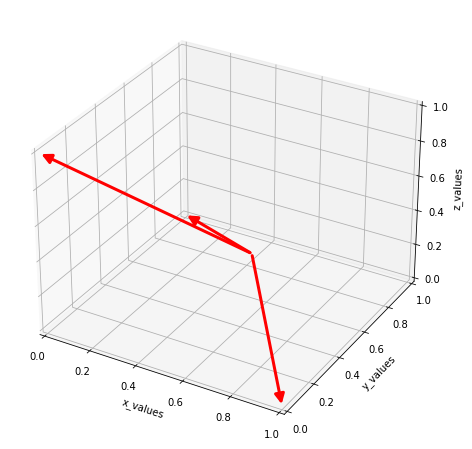

In [224]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

for v in eig_vec:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], 
                [mean_z, v[2]], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)

ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.draw()
plt.show()

**Fourier model**. Consider a smooth emmbedding of $S^{1}$ into $R^{3}$. Denote the coordinate functions by $x(t)$, $y(t)$, and $z(t)$. These smooth coordinate functions may be approximated by fourier series. Conversely we can generate coordinate functions that determine a knot, and choosing the Fourier coefficients randomly gives a model of random knots that are already smoothly embedded. In this context a Fourier $(i,j,k)-$knot is defined by the coorinates functions:

\begin{align}
x(t) = &\ A_{x,1}\cos(n_{x,1}t + \phi_{x,1}) + \cdots + A_{x,i} \cos(n_{x,i}t + \phi_{x,i}) \\
y(t) = &\ A_{y,1}\cos(n_{y,1}t + \phi_{y,1})\ + \cdots + A_{y,j} \cos(n_{y,j}t + \phi_{y,j}) \\
z(t) = &\ A_{z,1}\cos(n_{z,1}t + \phi_{z,1})\ + \cdots + A_{z,k} \cos(n_{z,k}t + \phi_{z,k}) \\
\end{align}

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

def coefs(i,j,k,m=10): #m is the maximum random integer
    Cx = [[x for x in np.random.randint(0,m,3)] for ix in range(i)] #Ax, nx, ϕx
    Cy = [[x for x in np.random.randint(0,m,3)] for jy in range(j)] #Ay, ny, ϕy
    Cz = [[x for x in np.random.randint(0,m,3)] for kz in range(k)] #Az, nz, ϕz
    return Cx,Cy,Cz
    
def Fourier_knot(ts, cs):
    pts = []
    for t in ts:
        pts.append( sum([ c[0]*np.cos( c[1]*t + c[2] ) for c in cs ] ) )
    return pts

def random_knots(n,i,j,k,m=10,p=10): #n is the number of nodes
    
    #Knot
    C = coefs(i,j,k,m)
    t = np.linspace(0,p,1000)
    x = Fourier_knot(t, C[0])
    y = Fourier_knot(t, C[1])
    z = Fourier_knot(t, C[2])
    knot = [go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=3, color='brown'))]
    
    #Nodes
#     r = np.linspace(0, (2*np.pi - 2*np.pi/n) - 0.1, n) #Nodes out of phase by 0.1
    r = np.sort( np.array( random.sample( range(2*n), n) )*(2*np.pi/(2*n)) ) #Random nodes
    a = Fourier_knot(r, C[0])
    b = Fourier_knot(r, C[1])
    c = Fourier_knot(r, C[2])
    
    #Array of indexes for antipodes
    lines = [[i, i + n//2] for i in range(n//2) ]
    
    #Circle
    xc, yc = np.cos(r), np.sin(r)
    circle = [go.Scatter(x=np.cos(t), y=np.sin(t), line=dict(width=2, color='brown'))]
    
    #Circle bars                               
    for m in lines:
        circle.append( go.Scatter( x = [ xc[m[0]], xc[m[1]] ], y = [ yc[m[0]], yc[m[1]] ], 
                                   line = dict(width=2), marker=dict(size=9)) )
    fig = go.Figure(data=circle)
    fig.update_yaxes(scaleanchor = 'x', scaleratio = 1)
    fig.show()

    #Bridges between antipodes
    for l in lines:
        knot.append(go.Scatter3d(x=[ a[l[0]], a[l[1]] ],
                                 y=[ b[l[0]], b[l[1]] ],
                                 z=[ c[l[0]], c[l[1]] ], line=dict(width=3)))

    fig = go.Figure(data=knot)
    fig.show()
    
    return np.hstack((np.vstack(x), np.vstack(y), np.vstack(z)))

In [8]:
for i in range(2,7,2):
    random_knots(6,2+i**2,3+i,5+i)

In [17]:
A = random_knots(6,11,2,3)

In [105]:
A.shape

(1000, 3)

In [119]:
import trimesh
import open3d as o3d

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(A) #Insert vector A of knot points 

knot_mesh = trimesh.points.PointCloud(A) #Insert vector A of knot points 
pcd.estimate_normals()
print(pcd)

PointCloud with 1000 points.


In [110]:
knot_mesh

<trimesh.PointCloud(vertices.shape=(1000, 3))>

In [42]:
np.random.uniform(-10,10,size=(5,3))

array([[ 5.82946952,  0.02126109, -8.17857074],
       [-7.01876522,  9.19089325, -8.4049608 ],
       [-6.71160025, -9.18827802, -1.82376162],
       [ 8.69716879, -3.98600428,  7.05481264],
       [ 9.35103427,  9.62206329, -6.65511443]])

In [163]:
distances = pcd.compute_nearest_neighbor_distance()
r = np.mean(distances)
print(r)

vari = []
for x in pcd.points:
    sphere = np.random.uniform(-10,10,size=(10,3))
    norms = np.array([np.linalg.norm(s) for s in sphere])
    puntos =  (r*sphere.T/norms).T
    sphere_x = puntos - x #np.array([np.linalg.norm(p) for p in puntos])
    vari.append(list(sphere_x))
print(np.asarray(pcd.points))

points_cloud = np.array(vari)
print('points_cloud.shape', points_cloud.shape)

#Sphere
sphere = [ go.Scatter3d( x=sphere_x[:,0], y=sphere_x[:,1], z=sphere_x[:,2], mode='markers', marker=dict(size=9, color='lightblue') ) ]
fig = go.Figure(data=sphere)
fig.update_yaxes(scaleanchor = 'x', scaleratio = 1)
fig.show()

0.2936986848659864
[[-6.90527084  6.50282455 10.81762638]
 [-6.69139403  6.6665548  10.76713861]
 [-6.46786587  6.79030876 10.71657517]
 ...
 [11.72412652 -4.48532605 -6.9030514 ]
 [10.61938096 -4.97487867 -6.88284604]
 [ 9.49668239 -5.46027972 -6.86026771]]
points_cloud.shape (1000, 10, 3)


In [121]:
points_cloud = points_cloud.reshape(points_cloud.shape[0]*points_cloud.shape[1], 3)
points_cloud.shape

(10000, 3)

In [129]:
plot_fat = [go.Scatter3d(x=points_cloud[:,0], y=points_cloud[:,1], z=points_cloud[:,2], mode='markers',
                                                                    marker=dict(size=1, color='red') )]
fig = go.Figure(data=plot_fat)
fig.show()

In [158]:
from_pcd = o3d.geometry.PointCloud()
from_pcd.points = o3d.utility.Vector3dVector(points_cloud)
from_pcd.estimate_normals()
radius = np.mean(from_pcd.compute_nearest_neighbor_distance())
print(radius)

mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(from_pcd, o3d.utility.DoubleVector([radius, 2*radius]))

mesh.compute_vertex_normals()

trinagles = np.asarray(mesh.triangle_normals)
mesh_plot = np.asarray(mesh.vertices)
print(mesh)
# o3d.visualization.draw_geometries([mesh])

0.1264593891007209
TriangleMesh with 10000 points and 6880 triangles.


In [159]:
mesh = trimesh.Trimesh(np.asarray(mesh.vertices), np.asarray(mesh.triangles), vertex_normals=np.asarray(mesh.vertex_normals))

In [127]:
new_mesh_vertices = mesh.vertices + mesh.vertex_normals
new_mesh = trimesh.Trimesh(vertices=new_mesh_vertices, faces=mesh.faces, process=False)

In [160]:
#o3d.visualization.draw_geometries([mesh])
mesh.show()